In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [3]:
import os
os.getcwd()
os.chdir('/home/piai/바탕화면/유아용품')

In [4]:
df_raw = pd.read_csv('고객정보데이터_Y포함_RFM미포함1.csv')
df_raw

,고객번호,성별,결혼유무,거주지역,연령,유입경로,자녀여부,총결제금액(M),평균결제금액,총구매횟수(F),첫구매물품,구매경과일(R),활동기간,구매금액표준편차,첫구매시월령,마지막구매시월령,총할인금액,총할인율(%),이탈여부
0,201905310906249,여,미혼,강원,30.0,인스타그램,No,238606,59652,4,2단계,0,395,53439,1.0,14.0,69334,22.52,1
1,201911051026236,여,기혼,경기,34.0,네이버카페,No,95902,95902,1,5단계,0,0,0,15.0,15.0,3998,4.00,1
2,201907190943018,남,기혼,전남,35.0,지인추천,Yes,290468,72617,4,4단계,0,255,20064,10.0,13.0,109812,27.43,1
3,201912051040386,여,기혼,경기,29.0,네이버블로그,Yes,50108,25054,1,3단계,0,0,35432,8.0,8.0,35692,41.60,1
4,201902220809806,여,기혼,제주,34.0,인스타그램,Yes,48388,48388,1,5단계,0,0,0,16.0,16.0,37412,43.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81061,201812310749942,여,기혼,경남,28.0,인스타그램,Yes,7642,7642,1,2단계,585,0,0,1.0,1.0,7798,50.51,0
81062,201812310750044,여,기혼,경기,34.0,지인추천,Yes,4831,4831,1,이벤트,585,0,0,7.0,7.0,1209,20.02,0
81063,201812310750017,여,기혼,경기,32.0,지인추천,Yes,4831,4831,1,이벤트,585,0,0,5.0,5.0,1209,20.02,0
81064,201901010750085,여,기혼,서울,33.0,네이버블로그,Yes,4158,4158,1,생리대,585,0,0,3.0,3.0,1092,20.80,0


In [5]:
df_raw.columns

Index(['고객번호', '성별', '결혼유무', '거주지역', '연령', '유입경로', '자녀여부', '총결제금액(M)',
       '평균결제금액', '총구매횟수(F)', '첫구매물품', '구매경과일(R)', '활동기간', '구매금액표준편차', '첫구매시월령',
       '마지막구매시월령', '총할인금액', '총할인율(%)', '이탈여부'],
      dtype='object')

In [6]:
print(df_raw.dtypes)

고객번호          int64
성별           object
결혼유무         object
거주지역         object
연령          float64
유입경로         object
자녀여부         object
총결제금액(M)      int64
평균결제금액        int64
총구매횟수(F)      int64
첫구매물품        object
구매경과일(R)      int64
활동기간          int64
구매금액표준편차      int64
첫구매시월령      float64
마지막구매시월령    float64
총할인금액         int64
총할인율(%)     float64
이탈여부          int64
dtype: object


In [7]:
df_raw.isnull().sum()

고객번호        0
성별          0
결혼유무        0
거주지역        0
연령          0
유입경로        0
자녀여부        0
총결제금액(M)    0
평균결제금액      0
총구매횟수(F)    0
첫구매물품       0
구매경과일(R)    0
활동기간        0
구매금액표준편차    0
첫구매시월령      0
마지막구매시월령    0
총할인금액       0
총할인율(%)     0
이탈여부        0
dtype: int64

In [8]:
df_raw.groupby('이탈여부')['구매경과일(R)'].mean()

이탈여부
0    361.104032
1     83.281811
Name: 구매경과일(R), dtype: float64

이탈여부가 0인 고객들은 마지막 구매 이후 평균 361일이 지났고,

이탈여부가 1인 고객들은 평균 83일밖에 지나지 않았다는 뜻

In [9]:
df_raw['이탈여부'].value_counts()

0    59328
1    21738
Name: 이탈여부, dtype: int64

이탈자 : 0 

비이탈자(유지고객) :1 

In [10]:
df_raw[df_raw['이탈여부'] == 1].sort_values('구매경과일(R)', ascending=False).head()
df_raw[df_raw['이탈여부'] == 0].sort_values('구매경과일(R)', ascending=True).head()

,고객번호,성별,결혼유무,거주지역,연령,유입경로,자녀여부,총결제금액(M),평균결제금액,총구매횟수(F),첫구매물품,구매경과일(R),활동기간,구매금액표준편차,첫구매시월령,마지막구매시월령,총할인금액,총할인율(%),이탈여부
21738,201906240924528,여,기혼,충남,35.0,인스타그램,Yes,209259,104630,2,3단계,181,29,6290,5.0,6.0,104661,33.34,0
21796,201906280928705,여,기혼,강원,32.0,인스타그램,Yes,54517,13629,4,이벤트,181,223,16263,2.0,10.0,15103,21.69,0
21795,201906020907865,여,미혼,충북,30.0,네이버블로그,No,164446,18272,6,수유용품,181,250,19603,5.0,13.0,41954,20.33,0
21794,201910161008903,여,기혼,경기,32.0,인스타그램,Yes,7821,7821,1,이벤트,181,0,0,13.0,13.0,79,1.00,0
21792,201904300881845,여,기혼,경북,33.0,인스타그램,Yes,19126,6375,3,이벤트,181,284,1266,8.0,17.0,2954,13.38,0


In [11]:
# 조건 1: 재구매 고객 (2회 이상)
cond_repurchase = df_raw['총구매횟수(F)'] >= 2

# 조건 2: 최근 6개월 이내 구매 (구매경과일이 180일 이하)
cond_recent = df_raw['구매경과일(R)'] <= 180

# 조건 3: 이탈하지 않은 고객
cond_not_churned = df_raw['이탈여부'] == 1

# 모든 조건을 AND로 결합
final_cond = cond_repurchase & cond_recent & cond_not_churned

# 조건을 만족하는 고객만 추출
df_target = df_raw[final_cond].copy()

In [12]:
print(f"최종 타겟 고객 수: {len(df_target)}명")
df_target.head()

최종 타겟 고객 수: 16776명


,고객번호,성별,결혼유무,거주지역,연령,유입경로,자녀여부,총결제금액(M),평균결제금액,총구매횟수(F),첫구매물품,구매경과일(R),활동기간,구매금액표준편차,첫구매시월령,마지막구매시월령,총할인금액,총할인율(%),이탈여부
0,201905310906249,여,미혼,강원,30.0,인스타그램,No,238606,59652,4,2단계,0,395,53439,1.0,14.0,69334,22.52,1
2,201907190943018,남,기혼,전남,35.0,지인추천,Yes,290468,72617,4,4단계,0,255,20064,10.0,13.0,109812,27.43,1
5,201904090865444,여,미혼,경기,34.0,인스타그램,No,509323,29960,12,2단계,0,462,21033,1.0,17.0,229557,31.07,1
6,201909080979591,여,기혼,경북,34.0,네이버블로그,Yes,233598,38933,3,3단계,0,247,25451,4.0,12.0,179582,43.46,1
7,201906110913060,여,기혼,충북,32.0,검색광고,Yes,171368,42842,4,2단계,0,305,27475,1.0,11.0,50072,22.61,1


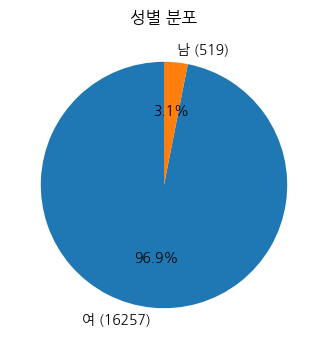

In [13]:
# 성별 분포 (남녀 비율)
gender_counts = df_target['성별'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(gender_counts, labels=[f'{label} ({count})' for label, count in gender_counts.items()],
        autopct='%1.1f%%', startangle=90)
plt.title('성별 분포')
plt.ylabel('')
plt.show()

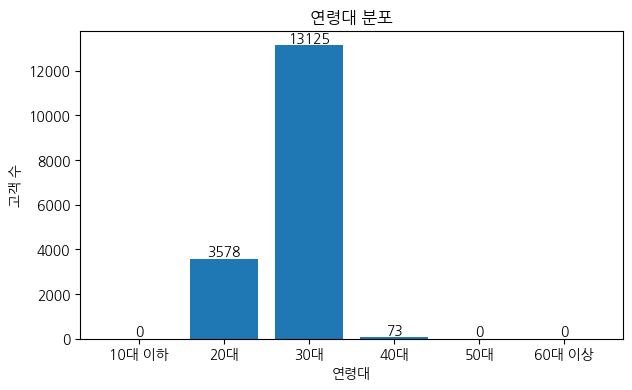

In [14]:
# 연령대 분포
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['10대 이하', '20대', '30대', '40대', '50대', '60대 이상']
df_target['연령대'] = pd.cut(df_target['연령'], bins=bins, labels=labels)

age_counts = df_target['연령대'].value_counts().sort_index()

plt.figure(figsize=(7,4))
bars = plt.bar(age_counts.index, age_counts.values)
plt.title('연령대 분포')
plt.xlabel('연령대')
plt.ylabel('고객 수')

# 바 위에 숫자 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

plt.show()

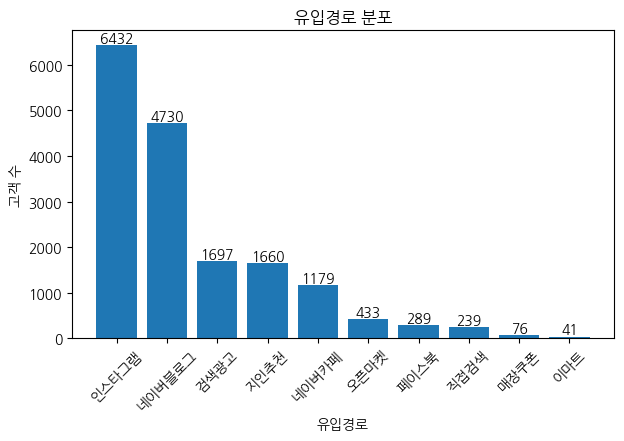

In [15]:
# 유입경로 분포 (바차트 + 명수)
source_counts = df_target['유입경로'].value_counts()

plt.figure(figsize=(7,4))
bars = plt.bar(source_counts.index, source_counts.values)
plt.title('유입경로 분포')
plt.xlabel('유입경로')
plt.ylabel('고객 수')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

plt.show()

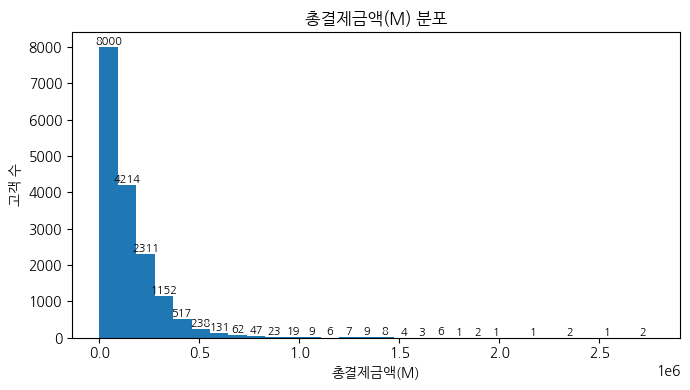

In [16]:
# 총결제금액(M) 히스토그램 (명수는 y축에 자연히 표시됨)
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7,4))

# 히스토그램 계산 (빈도와 구간)
counts, bins, patches = plt.hist(df_target['총결제금액(M)'], bins=30)

plt.title('총결제금액(M) 분포')
plt.xlabel('총결제금액(M)')
plt.ylabel('고객 수')

# 막대 위에 수치 표시
for count, patch in zip(counts, patches):
    if count > 0:  # 값이 있는 것만 표시
        plt.text(patch.get_x() + patch.get_width()/2, count + 0.5,
                 f'{int(count)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [17]:
import numpy as np
import pandas as pd

# 히스토그램 데이터 계산
counts, bins = np.histogram(df_target['총결제금액(M)'], bins=30)

# 구간 라벨 만들기
bin_labels = [f'{int(bins[i]):,} ~ {int(bins[i+1]):,}' for i in range(len(bins)-1)]

# 데이터프레임 만들기
hist_df = pd.DataFrame({
    '총결제금액 구간': bin_labels,
    '고객 수': counts
})

# 보기 좋게 상위부터 정렬
hist_df_sorted = hist_df.sort_values(by='고객 수', ascending=False).reset_index(drop=True)

# 출력
print(hist_df_sorted)

                 총결제금액 구간  고객 수
0              0 ~ 92,165  8000
1        92,165 ~ 184,330  4214
2       184,330 ~ 276,496  2311
3       276,496 ~ 368,661  1152
4       368,661 ~ 460,827   517
5       460,827 ~ 552,992   238
6       552,992 ~ 645,158   131
7       645,158 ~ 737,323    62
8       737,323 ~ 829,489    47
9       829,489 ~ 921,654    23
10    921,654 ~ 1,013,820    19
11  1,290,316 ~ 1,382,482     9
12  1,013,820 ~ 1,105,985     9
13  1,382,482 ~ 1,474,647     8
14  1,198,151 ~ 1,290,316     7
15  1,105,985 ~ 1,198,151     6
16  1,658,978 ~ 1,751,143     6
17  1,474,647 ~ 1,566,812     4
18  1,566,812 ~ 1,658,978     3
19  1,843,309 ~ 1,935,474     2
20  2,304,136 ~ 2,396,302     2
21  2,672,798 ~ 2,764,964     2
22  1,751,143 ~ 1,843,309     1
23  1,935,474 ~ 2,027,640     1
24  2,119,805 ~ 2,211,971     1
25  2,488,467 ~ 2,580,633     1
26  2,027,640 ~ 2,119,805     0
27  2,211,971 ~ 2,304,136     0
28  2,396,302 ~ 2,488,467     0
29  2,580,633 ~ 2,672,798     0


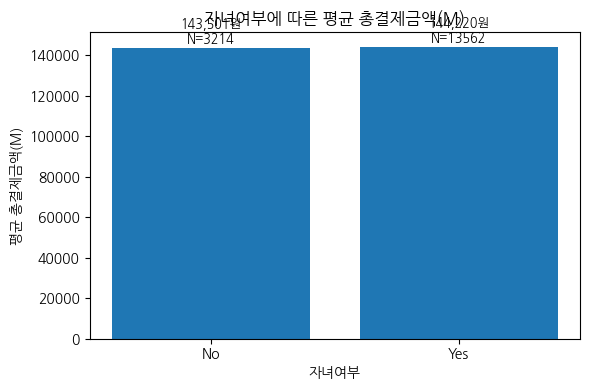

In [18]:
# 자녀여부별 평균 구매금액 (바차트 + 명수)
child_group = df_target.groupby('자녀여부')['총결제금액(M)'].agg(['mean', 'count'])

plt.figure(figsize=(6,4))
bars = plt.bar(child_group.index, child_group['mean'])

plt.title('자녀여부에 따른 평균 총결제금액(M)')
plt.xlabel('자녀여부')
plt.ylabel('평균 총결제금액(M)')

# 바 위에 평균 금액과 고객 수 같이 표시
for i, bar in enumerate(bars):
    mean_val = child_group['mean'].iloc[i]
    count = child_group['count'].iloc[i]
    
    text = f'{int(mean_val):,}원\nN={count}'
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
             text, ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

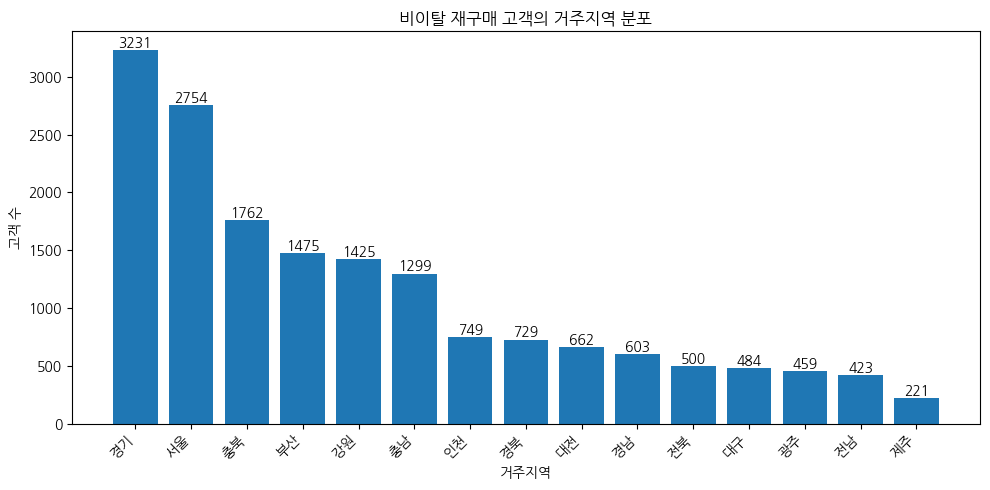

In [19]:
# 지역별 고객 수
import matplotlib.pyplot as plt

# 지역별 고객 수 집계
region_counts = df_target['거주지역'].value_counts()

# 시각화
plt.figure(figsize=(10,5))
bars = plt.bar(region_counts.index, region_counts.values)
plt.title('비이탈 재구매 고객의 거주지역 분포')
plt.xlabel('거주지역')
plt.ylabel('고객 수')
plt.xticks(rotation=45, ha='right')

# 바 위에 고객 수 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1,
             int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

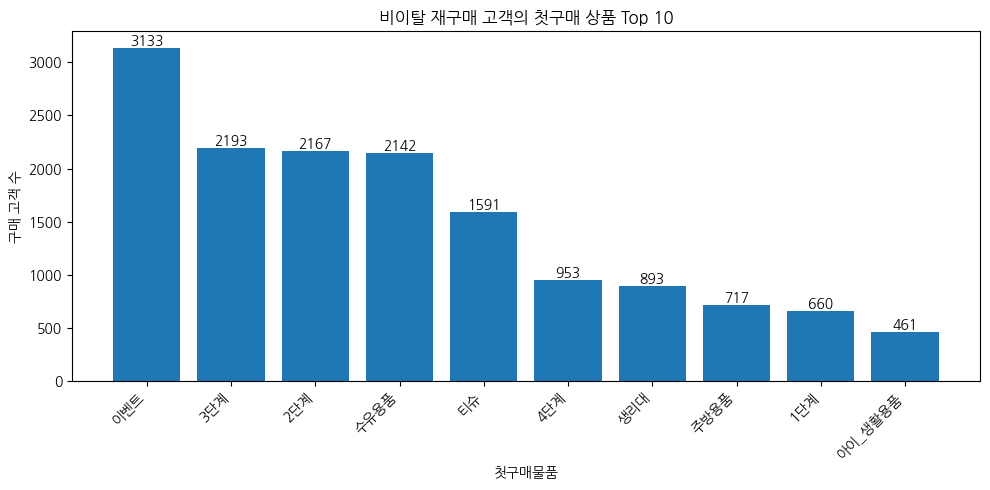

In [20]:
import matplotlib.pyplot as plt

# 상위 10개 상품 추출
top_items = df_target['첫구매물품'].value_counts().nlargest(10)

# 시각화
plt.figure(figsize=(10,5))
bars = plt.bar(top_items.index, top_items.values)
plt.title('비이탈 재구매 고객의 첫구매 상품 Top 10')
plt.xlabel('첫구매물품')
plt.ylabel('구매 고객 수')
plt.xticks(rotation=45, ha='right')

# 바 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1,
             int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

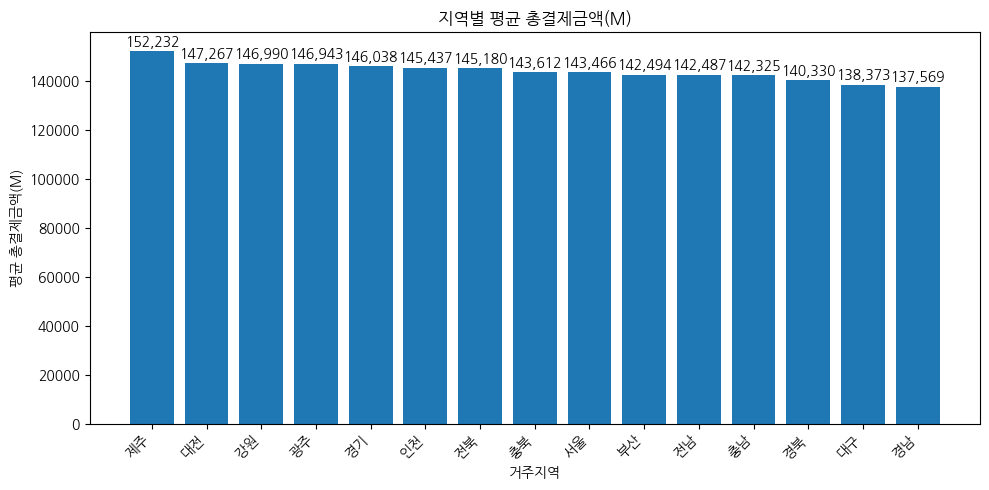

In [21]:
# 지역별 평균 결제 금액 비교 (df_target 기준)

import matplotlib.pyplot as plt

# 지역별 평균 총결제금액(M)
region_mean_payment = df_target.groupby('거주지역')['총결제금액(M)'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10,5))
bars = plt.bar(region_mean_payment.index, region_mean_payment.values)
plt.title('지역별 평균 총결제금액(M)')
plt.xlabel('거주지역')
plt.ylabel('평균 총결제금액(M)')
plt.xticks(rotation=45, ha='right')

# 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000,
             f'{int(yval):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

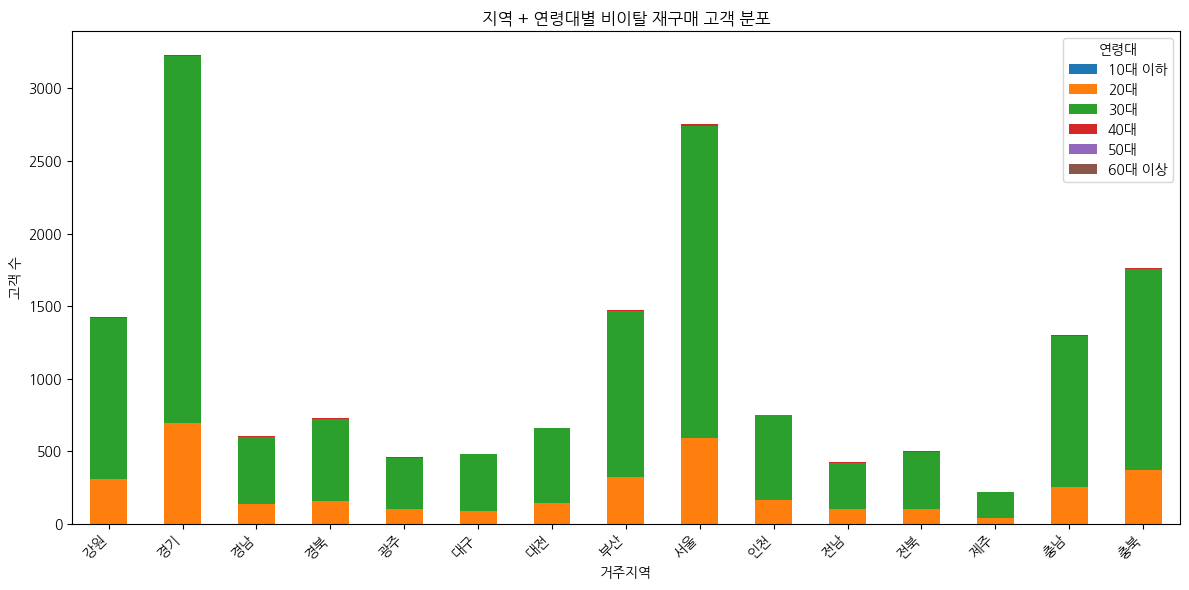

In [22]:
# 지역 + 연령대 조합 분석 (df_target 기준)

# 연령대를 먼저 나누자
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['10대 이하', '20대', '30대', '40대', '50대', '60대 이상']
df_target['연령대'] = pd.cut(df_target['연령'], bins=bins, labels=labels)

# 조합별 고객 수 집계
region_age = df_target.groupby(['거주지역', '연령대']).size().unstack().fillna(0)

# 시각화 (가로 막대 그래프 형태)
region_age.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('지역 + 연령대별 비이탈 재구매 고객 분포')
plt.xlabel('거주지역')
plt.ylabel('고객 수')
plt.xticks(rotation=45, ha='right')
plt.legend(title='연령대')
plt.tight_layout()
plt.show()

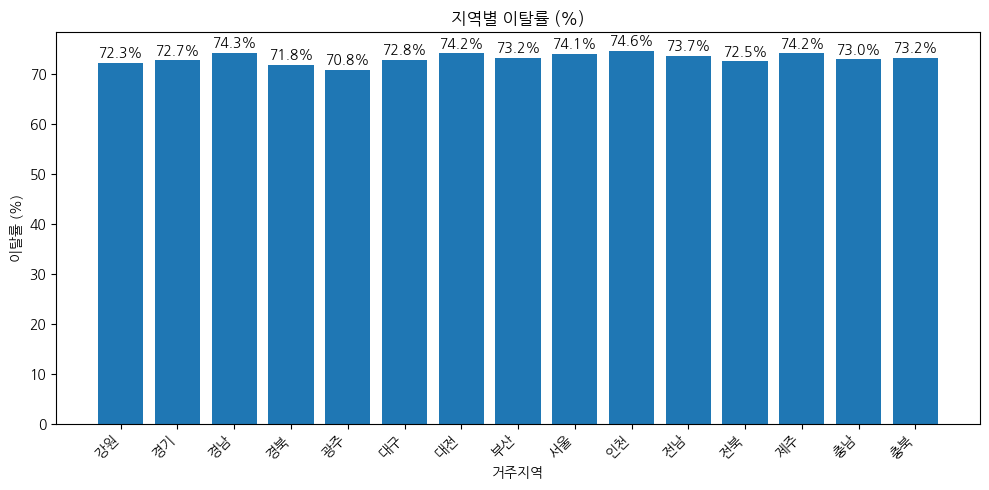

In [23]:
# 지역별 이탈률 분석 (df_raw 전체 기준)

# 지역별 이탈률 계산 (이탈여부 == 0이 이탈)
region_churn = df_raw.groupby('거주지역')['이탈여부'].agg(['count', 'sum'])

# sum은 이탈하지 않은 고객 수 → 이탈률 = (1 - 유지비율)
region_churn['이탈률'] = (1 - region_churn['sum'] / region_churn['count']) * 100

# 시각화
plt.figure(figsize=(10,5))
bars = plt.bar(region_churn.index, region_churn['이탈률'])
plt.title('지역별 이탈률 (%)')
plt.xlabel('거주지역')
plt.ylabel('이탈률 (%)')
plt.xticks(rotation=45, ha='right')

# 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5,
             f'{yval:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

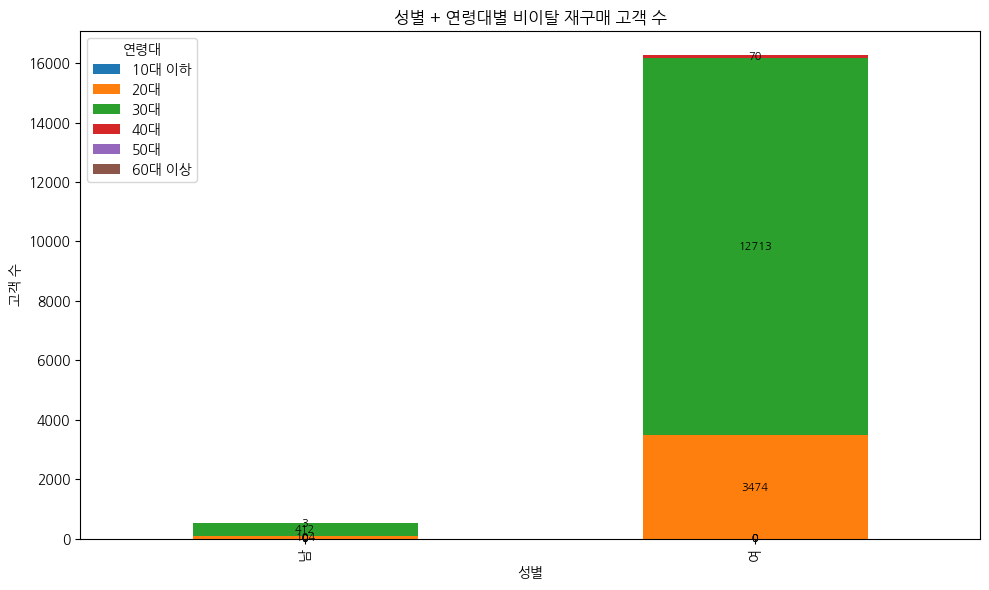

In [24]:
# 성별 + 연령대별 고객 수 분포

# 연령대 분류
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['10대 이하', '20대', '30대', '40대', '50대', '60대 이상']
df_target['연령대'] = pd.cut(df_target['연령'], bins=bins, labels=labels)

# 성별+연령대별 고객 수
sex_age = df_target.groupby(['성별', '연령대']).size().unstack().fillna(0)
ax = sex_age.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('성별 + 연령대별 비이탈 재구매 고객 수')
plt.xlabel('성별')
plt.ylabel('고객 수')

# 수치 표시
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8)

plt.legend(title='연령대')
plt.tight_layout()
plt.show()

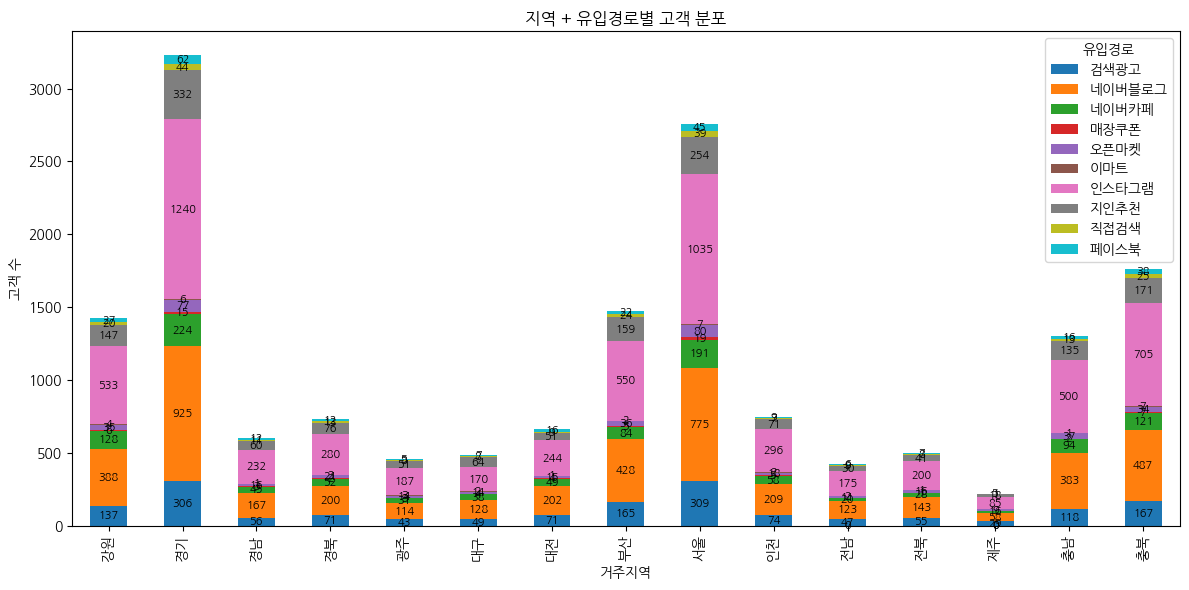

In [25]:
# 지역 + 유입경로별 고객 분포

region_source = df_target.groupby(['거주지역', '유입경로']).size().unstack().fillna(0)
ax = region_source.plot(kind='bar', stacked=True, figsize=(12,6))

plt.title('지역 + 유입경로별 고객 분포')
plt.xlabel('거주지역')
plt.ylabel('고객 수')

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8)

plt.legend(title='유입경로')
plt.tight_layout()
plt.show()

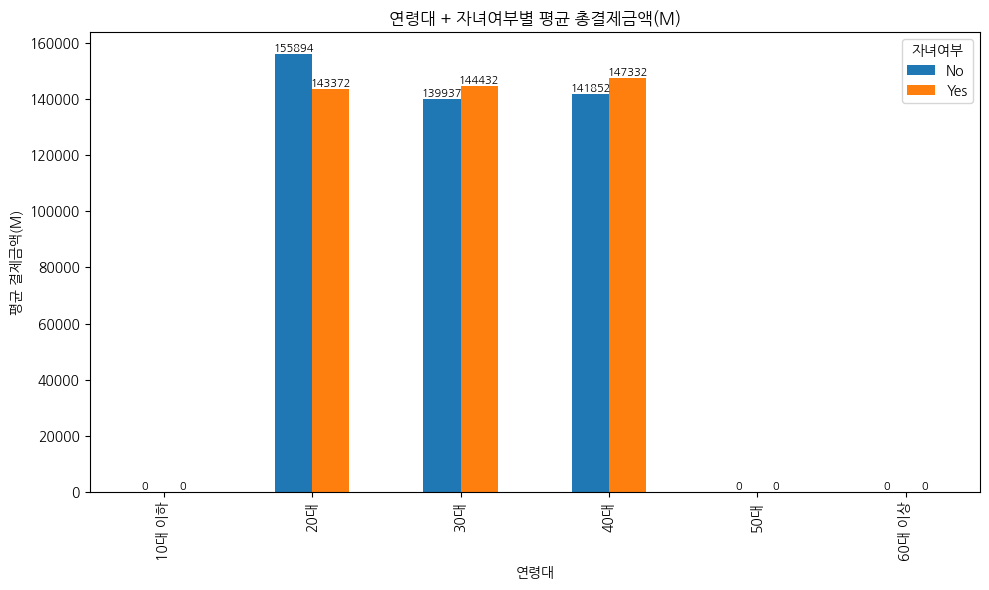

In [26]:
# 연령대 + 자녀여부별 평균 결제금액

child_age_pay = df_target.groupby(['연령대', '자녀여부'])['총결제금액(M)'].mean().unstack()
ax = child_age_pay.plot(kind='bar', figsize=(10,6))

plt.title('연령대 + 자녀여부별 평균 총결제금액(M)')
plt.xlabel('연령대')
plt.ylabel('평균 결제금액(M)')

# 수치 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=8)

plt.legend(title='자녀여부')
plt.tight_layout()
plt.show()

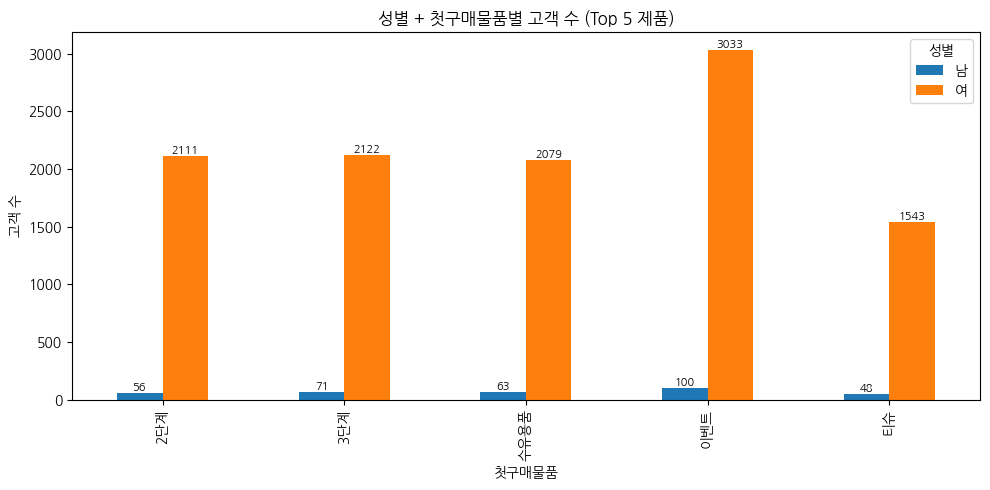

In [27]:
# 성별 + 첫구매물품별 고객 수 (Top 5 제품)

top5_items = df_target['첫구매물품'].value_counts().nlargest(5).index
df_top_items = df_target[df_target['첫구매물품'].isin(top5_items)]

sex_item = df_top_items.groupby(['첫구매물품', '성별']).size().unstack().fillna(0)
ax = sex_item.plot(kind='bar', figsize=(10,5))

plt.title('성별 + 첫구매물품별 고객 수 (Top 5 제품)')
plt.xlabel('첫구매물품')
plt.ylabel('고객 수')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)

plt.legend(title='성별')
plt.tight_layout()
plt.show()

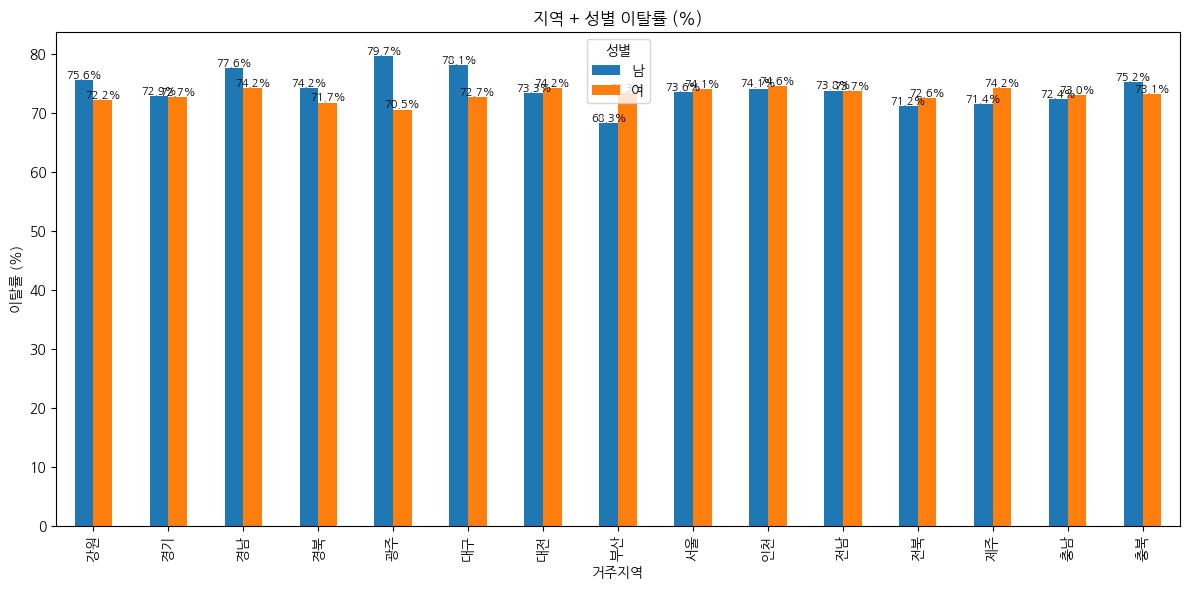

In [28]:
# 지역 + 성별 이탈률 (전체 기준)

region_sex_churn = df_raw.groupby(['거주지역', '성별'])['이탈여부'].agg(['count', 'sum'])
region_sex_churn['이탈률'] = (1 - region_sex_churn['sum'] / region_sex_churn['count']) * 100

churn_pivot = region_sex_churn['이탈률'].unstack()
ax = churn_pivot.plot(kind='bar', figsize=(12,6))

plt.title('지역 + 성별 이탈률 (%)')
plt.xlabel('거주지역')
plt.ylabel('이탈률 (%)')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=8)

plt.legend(title='성별')
plt.tight_layout()
plt.show()

🧭 분석 로드맵


1️⃣ 이탈자 집단과 비교 분석

→ 어떤 특성 차이가 있는지 통계적/시각적으로 비교


2️⃣ 전체 고객 대비 비이탈자 특징 분석

→ 비이탈자를 분류하는 결정적 요인을 찾기 (EDA + 통계 분석)


3️⃣ 클러스터링 + 예측 모델링

→ 고객 세분화 & 이탈 예측 모델 만들기 (머신러닝 기법 활용)

In [29]:
# 이탈자: 이탈여부 == 0
df_churned = df_raw[df_raw['이탈여부'] == 0].copy()

# 비이탈자: 이탈여부 == 1
df_active = df_raw[df_raw['이탈여부'] == 1].copy()

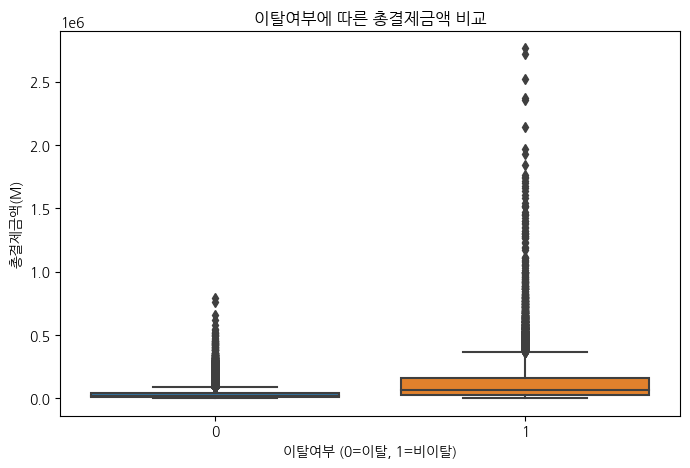

In [30]:
# 총결제금액 비교

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df_raw, x='이탈여부', y='총결제금액(M)')
plt.title('이탈여부에 따른 총결제금액 비교')
plt.xlabel('이탈여부 (0=이탈, 1=비이탈)')
plt.ylabel('총결제금액(M)')
plt.show()

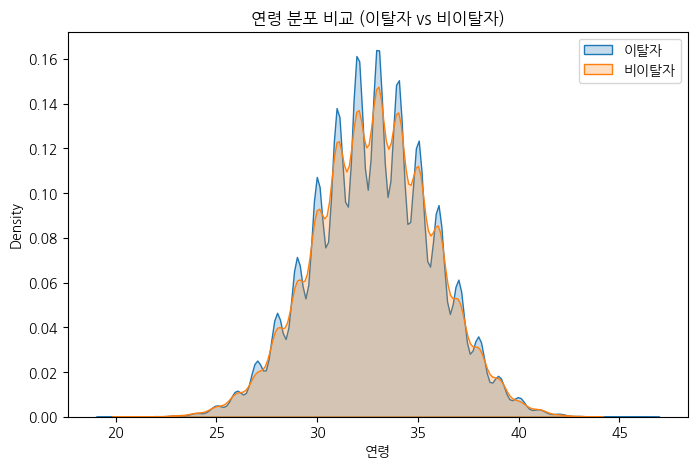

In [31]:
# 연령 분포 비교
plt.figure(figsize=(8,5))
sns.kdeplot(df_churned['연령'], label='이탈자', shade=True)
sns.kdeplot(df_active['연령'], label='비이탈자', shade=True)
plt.title('연령 분포 비교 (이탈자 vs 비이탈자)')
plt.xlabel('연령')
plt.legend()
plt.show()



    전체적으로 연령대 분포는 비슷하다
    → 이탈자와 비이탈자 모두 30~35세 사이에 가장 집중됨

    이탈자의 분포가 조금 더 높고 뾰족함
    → 같은 연령대라도 이탈자가 비이탈자보다 약간 더 밀집되어 있음
    → **젊은 연령대(30초반)**에서 이탈이 조금 더 많은 경향이 보임

    **극단 연령 (20대, 40대 중반)**에서는 차이 거의 없음
    → 이탈과 유지가 연령 극단보다는 중심에 몰려 있는 고객군에서 갈린다는 뜻
    
    연령 분포만 보면 → 크게 차이나진 않음	
    
하지만 약간의 뾰족한 차이 = **특정 연령대(30~34)**에서 이탈자 비중이 더 큼	

연령 하나만으론 예측 어려움 → 다른 변수와 함께 분석해야 유의미

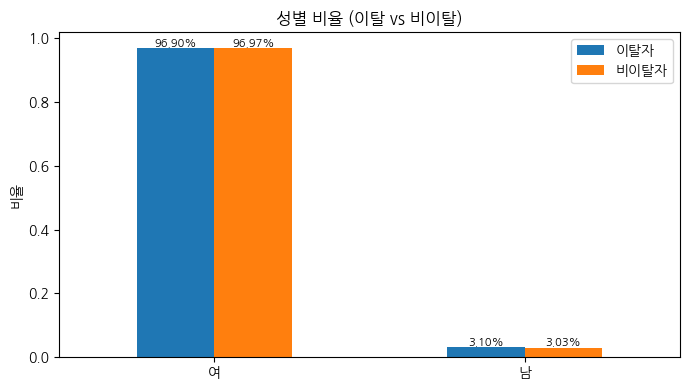

In [32]:
# 성별 비율 비교
import matplotlib.pyplot as plt
import pandas as pd

# 성별 비율 계산 (정규화)
gender_churn = df_churned['성별'].value_counts(normalize=True)
gender_active = df_active['성별'].value_counts(normalize=True)

# 데이터프레임 구성
gender_df = pd.DataFrame({'이탈자': gender_churn, '비이탈자': gender_active})

# 그래프 그리기
ax = gender_df.plot(kind='bar', figsize=(7,4), title='성별 비율 (이탈 vs 비이탈)', rot=0)
plt.ylabel('비율')

# 수치 표시
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v:.2%}' for v in container.datavalues], fontsize=8)

plt.tight_layout()
plt.show()

# 통계 검정
차이가 우연이 아닌, 실제 의미 있는 차이인지 판단하는 도구야.

수치형 변수	✅ 독립표본 t-검정 (ttest_ind)


범주형 변수	✅ 카이제곱 검정 (chi2_contingency)

수치형:

    총구매횟수(F)

    총결제금액(M)

    평균결제금액

    활동기간

    연령

    총할인율(%)

범주형:

    성별, 결혼유무, 자녀여부, 유입경로, 거주지역
    


“이탈자와 비이탈자 간에 어떤 변수가 유의미하게 다르냐?”

→ 이걸 알아야 고객 이탈 예측 모델의 핵심 변수(피처)를 제대로 선정

In [33]:
# 수치형 변수: t-검정

from scipy.stats import ttest_ind

numerical_cols = ['총구매횟수(F)', '총결제금액(M)', '평균결제금액', '활동기간', '연령', '총할인율(%)']

for col in numerical_cols:
    churned_values = df_churned[col].dropna()
    active_values = df_active[col].dropna()
    
    stat, p = ttest_ind(churned_values, active_values, equal_var=False)  # Welch’s t-test
    
    print(f'🔹 변수: {col}')
    print(f'  - 이탈자 평균: {churned_values.mean():,.2f}')
    print(f'  - 비이탈자 평균: {active_values.mean():,.2f}')
    print(f'  - p-value: {p:.5f}')
    print(f'  👉 {"유의한 차이 있음 ✅" if p < 0.05 else "차이 없음 ❌"}\n')

🔹 변수: 총구매횟수(F)
  - 이탈자 평균: 1.43
  - 비이탈자 평균: 4.27
  - p-value: 0.00000
  👉 유의한 차이 있음 ✅

🔹 변수: 총결제금액(M)
  - 이탈자 평균: 30,178.27
  - 비이탈자 평균: 116,150.95
  - p-value: 0.00000
  👉 유의한 차이 있음 ✅

🔹 변수: 평균결제금액
  - 이탈자 평균: 17,943.50
  - 비이탈자 평균: 23,075.54
  - p-value: 0.00000
  👉 유의한 차이 있음 ✅

🔹 변수: 활동기간
  - 이탈자 평균: 26.95
  - 비이탈자 평균: 201.54
  - p-value: 0.00000
  👉 유의한 차이 있음 ✅

🔹 변수: 연령
  - 이탈자 평균: 32.80
  - 비이탈자 평균: 32.83
  - p-value: 0.19756
  👉 차이 없음 ❌

🔹 변수: 총할인율(%)
  - 이탈자 평균: 23.58
  - 비이탈자 평균: 24.24
  - p-value: 0.00000
  👉 유의한 차이 있음 ✅



총구매횟수(F)	✅ 있음	비이탈자 평균이 약 3배 이상 많음 → 자주 사는 고객은 이탈 안 함

총결제금액(M)	✅ 있음	비이탈자는 거의 4배 가까이 더 씀 → 금액도 중요

평균결제금액	✅ 있음	1회당 결제 금액도 비이탈자가 더 큼

활동기간	✅ 있음	가장 큰 차이 → 오래 활동한 고객일수록 충성도 높음

연령	❌ 없음	이탈 여부와 거의 관련 없음 (통계적 차이 X)

총할인율(%)	✅ 있음	할인 많이 받은 사람이 이탈 확률 낮음 → 할인 민감도 고려 필요

In [34]:
# 범주형 변수: 카이제곱 검정

from scipy.stats import chi2_contingency

categorical_cols = ['성별', '결혼유무', '자녀여부', '유입경로', '거주지역']

for col in categorical_cols:
    contingency = pd.crosstab(df_raw[col], df_raw['이탈여부'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    
    print(f'🔸 범주형 변수: {col}')
    print(f'  - p-value: {p:.5f}')
    print(f'  👉 {"유의한 차이 있음 ✅" if p < 0.05 else "차이 없음 ❌"}\n')

🔸 범주형 변수: 성별
  - p-value: 0.65264
  👉 차이 없음 ❌

🔸 범주형 변수: 결혼유무
  - p-value: 0.49024
  👉 차이 없음 ❌

🔸 범주형 변수: 자녀여부
  - p-value: 0.77880
  👉 차이 없음 ❌

🔸 범주형 변수: 유입경로
  - p-value: 0.98849
  👉 차이 없음 ❌

🔸 범주형 변수: 거주지역
  - p-value: 0.01454
  👉 유의한 차이 있음 ✅



p < 0.05면 → 이탈자와 비이탈자 간 해당 변수에서 통계적으로 유의한 차이 있음

결과는 이탈 예측 모델의 주요 피처 선정에도 활용 가능

In [35]:
from scipy.stats import ttest_ind
import pandas as pd

numerical_cols = ['총구매횟수(F)', '총결제금액(M)', '평균결제금액', '활동기간', '연령', '총할인율(%)']
t_test_results = []

for col in numerical_cols:
    churned_values = df_churned[col].dropna()
    active_values = df_active[col].dropna()
    stat, p = ttest_ind(churned_values, active_values, equal_var=False)

    t_test_results.append({
        '변수': col,
        '이탈자 평균': churned_values.mean(),
        '비이탈자 평균': active_values.mean(),
        'p-value': p,
        '유의미한 차이': '✅' if p < 0.05 else '❌'
    })

t_test_df = pd.DataFrame(t_test_results)
display(t_test_df)

,변수,이탈자 평균,비이탈자 평균,p-value,유의미한 차이
0,총구매횟수(F),1.429999,4.271460,0.000000e+00,✅
1,총결제금액(M),30178.273143,116150.952894,0.000000e+00,✅
2,평균결제금액,17943.497236,23075.537124,1.063161e-293,✅
3,활동기간,26.954844,201.544990,0.000000e+00,✅
4,연령,32.795274,32.825329,1.975592e-01,❌
5,총할인율(%),23.584950,24.235788,8.795306e-11,✅


활동기간, 총구매횟수, 총결제금액은 이탈과 강하게 연결
→ 💥 이 변수들은 이탈 예측 모델의 핵심 피처

연령은 영향 없음
→ 단독으론 의미 없지만, 조합(자녀여부 등)에서는 활용 가능성 있음

총할인율도 유의미
→ 할인 많이 받은 고객은 이탈 덜 함
→ 마케팅 전략에서 할인 쿠폰 or 포인트 제공이 효과 있을 수 있음

In [36]:
from scipy.stats import chi2_contingency

categorical_cols = ['성별', '결혼유무', '자녀여부', '유입경로', '거주지역']
chi2_results = []

for col in categorical_cols:
    contingency = pd.crosstab(df_raw[col], df_raw['이탈여부'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi2_results.append({
        '변수': col,
        'p-value': p,
        '유의미한 차이': '✅' if p < 0.05 else '❌'
    })

chi2_df = pd.DataFrame(chi2_results)
display(chi2_df)

,변수,p-value,유의미한 차이
0,성별,0.652639,❌
1,결혼유무,0.490245,❌
2,자녀여부,0.778796,❌
3,유입경로,0.988489,❌
4,거주지역,0.014538,✅


KMeans 클러스터링(고객 세분화)분석

고객의 특성을 기준으로 유사한 그룹(세그먼트) 을 자동으로 나누는 작업

비이탈 재구매 고객 집단(df_target)을 소비 패턴 기반 클러스터로 나누기

클러스터별로 행동/소비 차이 파악 → 마케팅 타겟 전략 수립 가능

In [37]:
# 클러스터링에 사용할 특성 선택
cluster_cols = ['총구매횟수(F)', '총결제금액(M)', '평균결제금액', '활동기간', '총할인율(%)', '연령']
df_cluster = df_target[cluster_cols].dropna().copy()

In [38]:
# 정규화 (스케일 조정)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

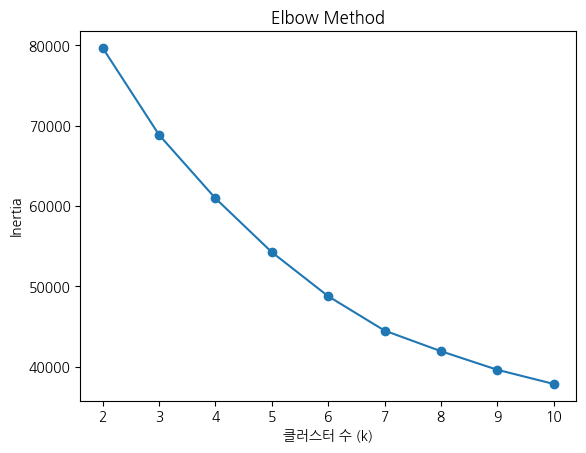

In [39]:
# 적절한 클러스터 수(k) 찾기 (엘보우 방법)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('클러스터 수 (k)')
plt.ylabel('Inertia')
plt.show()

In [40]:
# k=4 사용 (엘보우 결과 보고 수정 가능)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df_cluster['클러스터'] = kmeans.fit_predict(scaled_data)

In [41]:
# 클러스터별 평균 특성 확인
cluster_summary = df_cluster.groupby('클러스터').mean()
display(cluster_summary)

,총구매횟수(F),총결제금액(M),평균결제금액,활동기간,총할인율(%),연령
클러스터,,,,,,
0,3.469115,107478.264751,29344.126921,173.713737,31.160300,32.861862
1,3.613641,45538.303986,11080.678632,260.833365,18.218785,32.738712
2,32.043689,880691.165049,26540.383495,382.150485,22.205728,32.645631
3,8.300692,271588.474313,31053.030405,375.622143,30.926620,32.855735


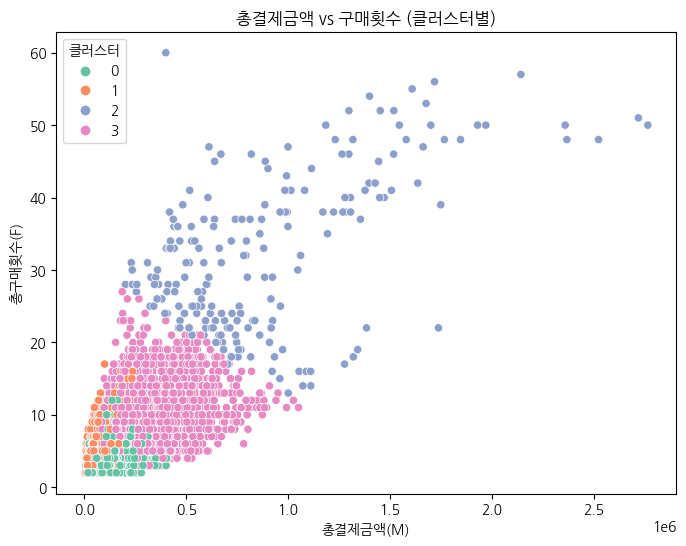

In [42]:
# 시각화 (총결제금액 vs 구매횟수)

import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cluster, x='총결제금액(M)', y='총구매횟수(F)', hue='클러스터', palette='Set2')
plt.title('총결제금액 vs 구매횟수 (클러스터별)')
plt.xlabel('총결제금액(M)')
plt.ylabel('총구매횟수(F)')
plt.legend(title='클러스터')
plt.show()

클러스터링 시각화(총결제금액 vs 구매횟수, 클러스터별 구분)는
**단순한 예측을 넘어서, “고객 유형을 그룹으로 나누고 그 특성을 이해하기 위해 수행한 것”**
즉, 고객 세그먼테이션(세분화) 작업

🎯 고객 유형 파악	단순히 숫자로만 보는 게 아니라, 비슷한 행동 특성을 가진 고객들을 그룹으로 나눔

🔍 행동 패턴 기반 분류	고객을 금액/빈도/할인 등 소비 행동 기준으로 나눠야 맞춤 전략이 가능함

📈 개인화 마케팅	각 그룹마다 다른 마케팅 메시지, 혜택, 유지 전략 설계 가능

🔁 이탈 분석과 연계	나중에 "어떤 군집이 더 잘 이탈하는가?" → 위험군 식별 가능

📊 데이터 요약	10만 명을 직접 보기 어렵기 때문에, 몇 개의 대표 그룹으로 요약해서 해석 가능


📩 타겟 마케팅	클러스터 0번(저활동)에게만 푸시 알림 보내기

🎁 혜택 설계	클러스터 2번은 VIP 혜택 전용 프로모션

📉 이탈 분석	“클러스터 1번이 이탈률이 높네?” → 위험군 추적 가능

📦 추천상품	군집별로 많이 사는 상품 → 자동 추천

In [43]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 클러스터링 대상 변수
cluster_cols = ['총구매횟수(F)', '총결제금액(M)', '평균결제금액', '활동기간', '총할인율(%)', '연령']
df_cluster = df_target[cluster_cols].dropna().copy()

# 정규화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# KMeans 클러스터링 (k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster['클러스터'] = kmeans.fit_predict(scaled_data)

# 클러스터별 평균값 + 고객 수 정리
cluster_summary = df_cluster.groupby('클러스터').mean().round(1)
cluster_summary['고객 수'] = df_cluster['클러스터'].value_counts().sort_index()

# 결과 확인
display(cluster_summary)

,총구매횟수(F),총결제금액(M),평균결제금액,활동기간,총할인율(%),연령,고객 수
클러스터,,,,,,,
0,3.5,107478.3,29344.1,173.7,31.2,32.9,6508
1,3.6,45538.3,11080.7,260.8,18.2,32.7,5293
2,32.0,880691.2,26540.4,382.2,22.2,32.6,206
3,8.3,271588.5,31053.0,375.6,30.9,32.9,4769


★ 클러스터 2 (녹색)	고결제 + 고구매횟수	🎯 VIP 충성 고객

결제 금액도 높고 자주 구매하는 핵심 고객


★ 클러스터 0 (주황)	저결제 + 저구매	🔻 저활동 저가형 고객

잊을만 하면 한 번 사는 정도. 이탈 가능성 ↑


★ 클러스터 3 (분홍)	중간 결제 + 중간 횟수	📦 일반 충성 고객

VIP는 아니지만 꾸준히 활동


★ 클러스터 1 (파랑)	낮은 결제금액 but 상대적으로 반복 구매	💸 소액 다빈도 고객

금액은 작지만 여러 번 구매하는 패턴

2 (VIP)	등급 유지/전용 혜택 제공, 리텐션 집중

0 (소극적)	활성화 캠페인, 리마인드 메시지

1 (소액 빈도형)	묶음 할인, 정기배송 유도

3 (일반)	리뷰 이벤트, 포인트 리워드 강화

<Figure size 1000x600 with 0 Axes>

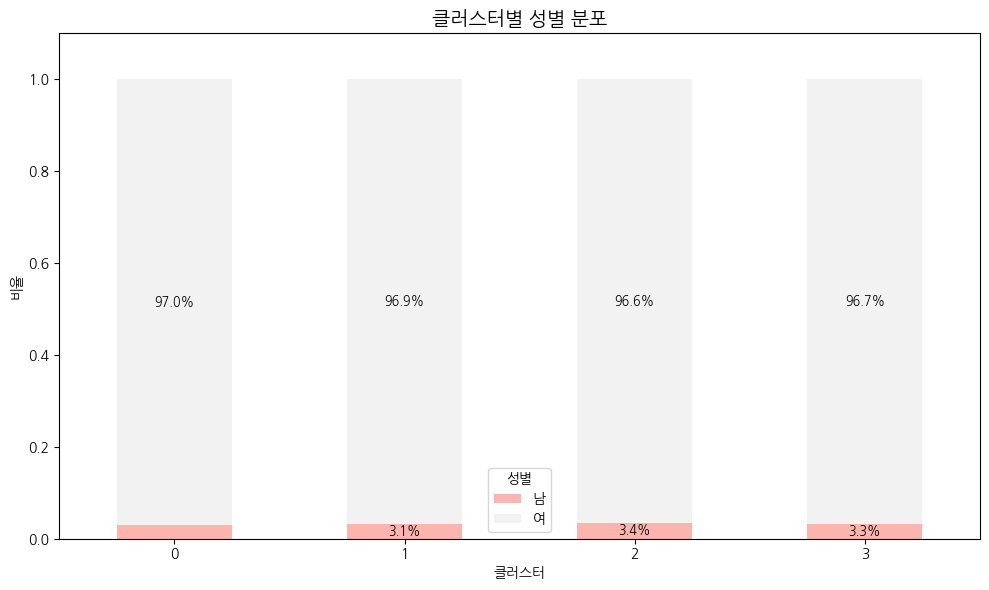

<Figure size 1000x600 with 0 Axes>

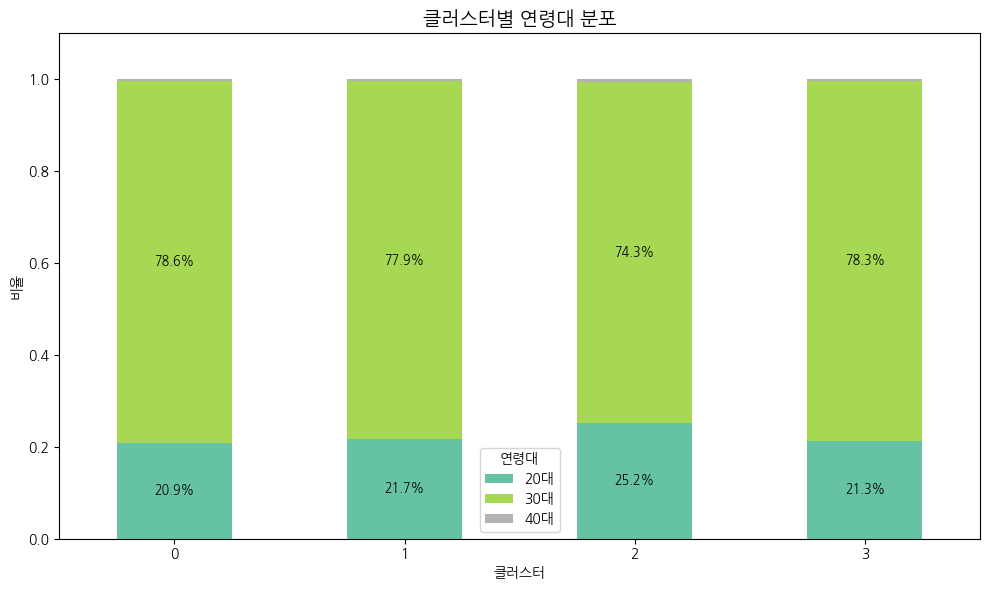

<Figure size 1000x600 with 0 Axes>

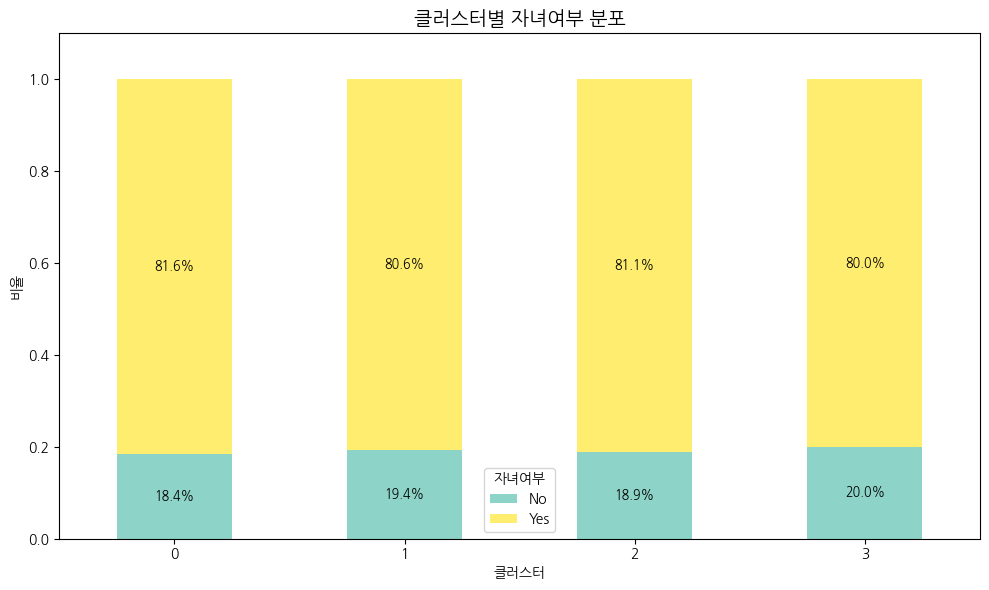

In [44]:
# 클러스터별 성별 / 연령대 / 자녀여부 분포 시각화 코드

import matplotlib.pyplot as plt
import pandas as pd

# 인구통계 + 클러스터 정보 병합
df_demo = df_target[['성별', '연령', '자녀여부']].copy()
df_demo = df_demo.loc[df_cluster.index]
df_demo['클러스터'] = df_cluster['클러스터']

# 연령대 구간 만들기
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['10대 이하', '20대', '30대', '40대', '50대', '60대 이상']
df_demo['연령대'] = pd.cut(df_demo['연령'], bins=bins, labels=labels)

# 분포표
sex_dist = pd.crosstab(df_demo['클러스터'], df_demo['성별'], normalize='index')
age_dist = pd.crosstab(df_demo['클러스터'], df_demo['연령대'], normalize='index')
child_dist = pd.crosstab(df_demo['클러스터'], df_demo['자녀여부'], normalize='index')

# 시각화 함수 정의
def plot_cluster_distribution(df_dist, title, cmap):
    plt.figure(figsize=(10, 6))
    ax = df_dist.plot(kind='bar', stacked=True, colormap=cmap, figsize=(10,6))
    ax.set_title(title, fontsize=14)
    ax.set_ylabel('비율')
    ax.set_ylim(0, 1.1)

    # 수치 표시
    for container in ax.containers:
        ax.bar_label(container, labels=[f'{v*100:.1f}%' if v > 0.03 else '' for v in container.datavalues],
                     fontsize=9, label_type='center')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# 각각 개별 출력
plot_cluster_distribution(sex_dist, '클러스터별 성별 분포', 'Pastel1')
plot_cluster_distribution(age_dist, '클러스터별 연령대 분포', 'Set2')
plot_cluster_distribution(child_dist, '클러스터별 자녀여부 분포', 'Set3')

연령대 분포 -> 클러스터 2 = 젊은층 중심 세그먼트로 마케팅 전략 조정 가능

In [45]:
sales = pd.read_csv('really_last_final.csv')
sales

,주문번호,배송완료일,배송시작일,구매일,구매시월령,고객번호,구매금액,결제금액,상품명,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,물품대분류,물품소분류,브랜드,프로모션
0,00806150357-86242814116172,2024-08-11,2024-08-09,2024-08-08,14.0,201905310906249,177200,136422,NEW 하기스 맥스드라이 팬티 4단계 여아 96매(팬티형),여,미혼,강원,30.0,신한은행,인스타그램,No,4단계,기저귀_팬티형,하기스,프로모션 없음
1,00806200903-66417349184924,2024-08-12,2024-08-09,2024-08-08,15.0,201911051026236,99900,95902,NEW 하기스 네이처메이드 팬티 5단계 여아 160매(팬티형),여,기혼,경기,34.0,국민은행,네이버카페,No,5단계,기저귀_팬티형,하기스,프로모션 없음
2,00806230122-60989359139880,2024-08-11,2024-08-09,2024-08-08,13.0,201907190943018,99800,73588,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형),남,기혼,전남,35.0,국민은행,지인추천,Yes,4단계,기저귀_팬티형,하기스,프로모션 없음
3,00806210424-48271954191115,2024-08-13,2024-08-09,2024-08-08,8.0,201912051040386,85800,50108,2020 하기스 매직팬티 컴포트 썸머 3단계 공용 116매(팬티형) + 보너스 12...,여,기혼,경기,29.0,BC카드,네이버블로그,Yes,3단계,기저귀_팬티형,하기스,증정
4,00806220921-6491874449687,2024-08-12,2024-08-09,2024-08-08,16.0,201902220809806,85800,48388,2020 하기스 매직팬티 컴포트 썸머 5단계 공용 160매(팬티형),여,기혼,제주,34.0,삼성카드,인스타그램,Yes,5단계,기저귀_팬티형,하기스,프로모션 없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199305,812311863820235,2023-01-05,2023-01-02,2023-01-01,5.0,201812310750017,6040,4831,하기스 네이처메이드 3단계 남아 20매(밴드형/체험팩),여,기혼,경기,32.0,우리은행,지인추천,Yes,이벤트,프로모션_체험팩,하기스,프로모션 없음
199306,901011864625178,2023-01-04,2023-01-02,2023-01-01,10.0,201812310749946,7280,4672,하기스 네이처메이드 팬티 3단계 여아 20매(팬티형/체험팩),여,기혼,인천,37.0,신한은행,검색광고,Yes,이벤트,프로모션_체험팩,하기스,프로모션 없음
199307,901011864217302,2023-01-05,2023-01-02,2023-01-01,3.0,201901010750085,5250,4158,좋은느낌 솜솜 특대형 날개형 12개입,여,기혼,서울,33.0,SC제일은행,네이버블로그,Yes,생리대,생리대,좋은느낌,프로모션 없음
199308,901011864967483,2023-01-05,2023-01-02,2023-01-01,1.0,201901010750264,6040,3861,하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩),여,기혼,서울,36.0,국민은행,페이스북,Yes,이벤트,프로모션_체험팩,하기스,프로모션 없음


In [46]:
# 비이탈 재구매 고객의 ID 추출
target_ids = df_target['고객번호'].unique()

In [47]:
# sales 데이터에서 해당 고객들의 구매 이력만 필터링
df_target_sales = sales[sales['고객번호'].isin(target_ids)].copy()

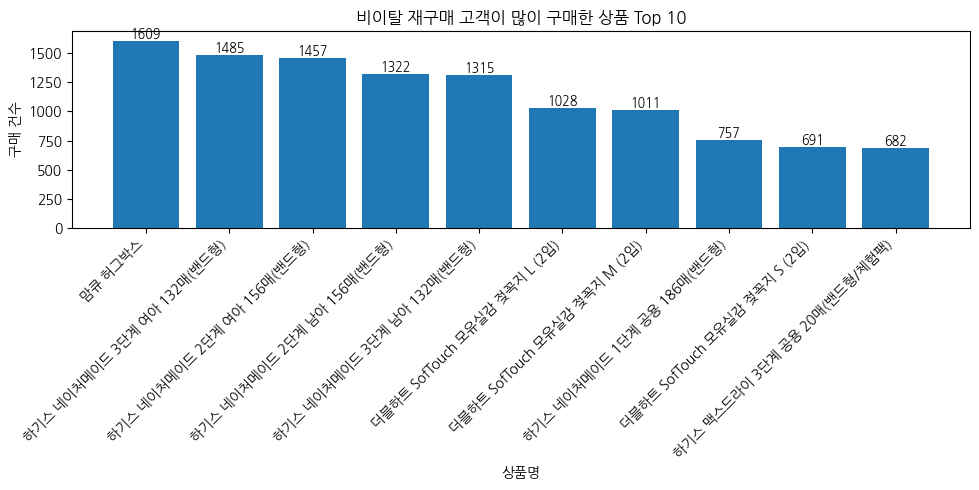

In [48]:
# 가장 많이 팔린 상품 Top 10 추출 & 시각화
import matplotlib.pyplot as plt

top_products = df_target_sales['상품명'].value_counts().nlargest(10)

plt.figure(figsize=(10,5))
bars = plt.bar(top_products.index, top_products.values)
plt.title('비이탈 재구매 고객이 많이 구매한 상품 Top 10')
plt.xlabel('상품명')
plt.ylabel('구매 건수')
plt.xticks(rotation=45, ha='right')

# 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1,
             int(yval), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [49]:
df_target.columns

Index(['고객번호', '성별', '결혼유무', '거주지역', '연령', '유입경로', '자녀여부', '총결제금액(M)',
       '평균결제금액', '총구매횟수(F)', '첫구매물품', '구매경과일(R)', '활동기간', '구매금액표준편차', '첫구매시월령',
       '마지막구매시월령', '총할인금액', '총할인율(%)', '이탈여부', '연령대'],
      dtype='object')

In [50]:
sales.columns

Index(['주문번호', '배송완료일', '배송시작일', '구매일', '구매시월령', '고객번호', '구매금액', '결제금액', '상품명',
       '성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부', '물품대분류', '물품소분류',
       '브랜드', '프로모션'],
      dtype='object')

In [51]:
# 고객 특성 다시 정리
df_target_info = df_target[['고객번호', '성별', '연령', '자녀여부']].drop_duplicates()

# merge
df_merged = df_top_items.merge(df_target_info, on='고객번호', how='left')

In [52]:
# '_y' 컬럼을 기준으로 새롭게 정의
df_merged['연령'] = df_merged['연령_y']
df_merged['성별'] = df_merged['성별_y']
df_merged['자녀여부'] = df_merged['자녀여부_y']

In [53]:
print(df_merged.columns)

Index(['고객번호', '성별_x', '결혼유무', '거주지역', '연령_x', '유입경로', '자녀여부_x', '총결제금액(M)',
       '평균결제금액', '총구매횟수(F)', '첫구매물품', '구매경과일(R)', '활동기간', '구매금액표준편차', '첫구매시월령',
       '마지막구매시월령', '총할인금액', '총할인율(%)', '이탈여부', '연령대', '성별_y', '연령_y', '자녀여부_y',
       '연령', '성별', '자녀여부'],
      dtype='object')


In [67]:
df_merged.describe

<bound method NDFrame.describe of                   고객번호 성별_x 결혼유무 거주지역  연령_x    유입경로 자녀여부_x  총결제금액(M)  평균결제금액  \
0      201905310906249    여   미혼   강원  30.0   인스타그램     No    238606   59652   
1      201904090865444    여   미혼   경기  34.0   인스타그램     No    509323   29960   
2      201909080979591    여   기혼   경북  34.0  네이버블로그    Yes    233598   38933   
3      201906110913060    여   기혼   충북  32.0    검색광고    Yes    171368   42842   
4      201902250813577    여   기혼   서울  27.0  네이버블로그    Yes    163200   20400   
...                ...  ...  ...  ...   ...     ...    ...       ...     ...   
11221  201907220944528    여   기혼   경남  34.0  네이버블로그    Yes     43252   21626   
11222  201907010930493    여   기혼   강원  36.0   인스타그램    Yes     61158   15290   
11223  201906260927143    여   기혼   경기  31.0   네이버카페    Yes     40523   20262   
11224  201912251056260    여   기혼   서울  29.0   인스타그램    Yes      7851    3926   
11225  201908080957688    여   기혼   전남  33.0  네이버블로그    Yes     13859    6930   

     

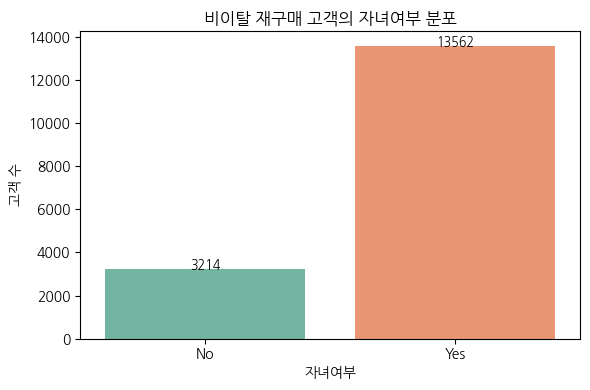

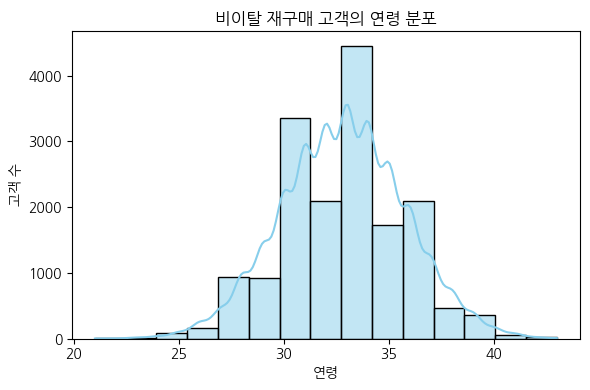

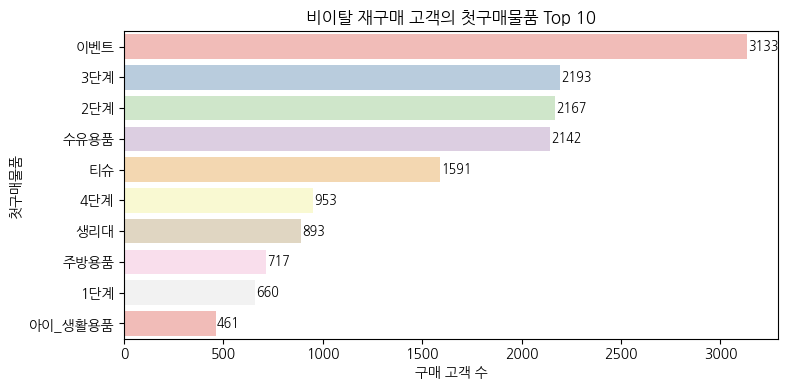

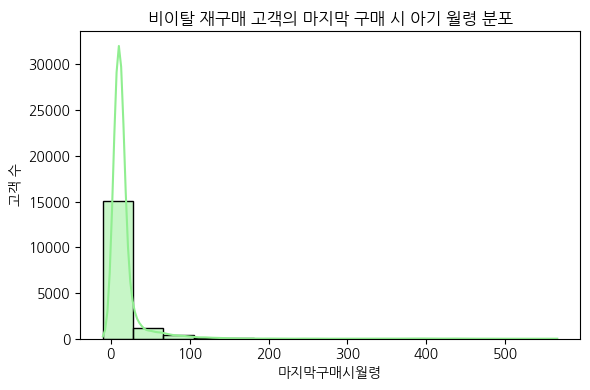

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 자녀여부 분포
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_target, x='자녀여부', palette='Set2')
plt.title('비이탈 재구매 고객의 자녀여부 분포')
plt.xlabel('자녀여부')
plt.ylabel('고객 수')
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width()/2, count + 5, f'{count}', ha='center', fontsize=9)
plt.tight_layout()
plt.show()

# 2. 연령 분포
plt.figure(figsize=(6,4))
ax = sns.histplot(df_target['연령'], bins=15, kde=True, color='skyblue')
plt.title('비이탈 재구매 고객의 연령 분포')
plt.xlabel('연령')
plt.ylabel('고객 수')
plt.tight_layout()
plt.show()

# 3. 첫구매물품 Top 10
top_items = df_target['첫구매물품'].value_counts().head(10)
plt.figure(figsize=(8,4))
ax = sns.barplot(x=top_items.values, y=top_items.index, palette='Pastel1')
plt.title('비이탈 재구매 고객의 첫구매물품 Top 10')
plt.xlabel('구매 고객 수')
plt.ylabel('첫구매물품')
for i, v in enumerate(top_items.values):
    ax.text(v + 5, i, str(v), color='black', va='center', fontsize=9)
plt.tight_layout()
plt.show()

# 4. 마지막구매시월령 분포
plt.figure(figsize=(6,4))
ax = sns.histplot(df_target['마지막구매시월령'], bins=15, color='lightgreen', kde=True)
plt.title('비이탈 재구매 고객의 마지막 구매 시 아기 월령 분포')
plt.xlabel('마지막구매시월령')
plt.ylabel('고객 수')
plt.tight_layout()
plt.show()

In [55]:
# 비이탈 + 재구매 고객의 구매이력 필터링
target_ids = df_target['고객번호'].unique()
df_target_sales = sales[sales['고객번호'].isin(target_ids)].copy()

In [56]:
# 고객별로 가장 많이 반복 구매한 상품 찾기

# 고객별 상품 구매 횟수
repurchase = df_target_sales.groupby(['고객번호', '상품명']).size().reset_index(name='구매횟수')

# 구매횟수 높은 순으로 보기
repurchase = repurchase[repurchase['구매횟수'] > 1]
top_repeat_items = repurchase['상품명'].value_counts().head(10)
print(top_repeat_items)

하기스 네이처메이드 3단계 여아 132매(밴드형)           293
하기스 네이처메이드 2단계 여아 156매(밴드형)           244
하기스 네이처메이드 3단계 남아 132매(밴드형)           239
하기스 네이처메이드 2단계 남아 156매(밴드형)           211
하기스 네이처메이드 팬티 4단계 여아 96매(팬티형)         121
하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)        105
2020 하기스 매직 컴포트 3단계 공용 180매(밴드형)      101
2020 하기스 매직팬티 컴포트 4단계 남아 132매(팬티형)     99
하기스 네이처메이드 팬티 3단계 여아 116매(팬티형)         99
하기스 네이처메이드 1단계 공용 186매(밴드형)            95
Name: 상품명, dtype: int64


In [57]:
# 상품별 평균 재구매 횟수 보기
item_repeat = repurchase.groupby('상품명')['구매횟수'].mean().sort_values(ascending=False).head(10)
print(item_repeat)

상품명
더블하트 SofTouch 모유실감 노꼭지 트윈팩 240ml(오렌지)             16.000000
크리넥스 버블버블 핸드워시 상큼향 용기 250ml + 용기형 리필 250ml x 2    11.000000
트레제메 모이스처 리치 샴푸 900ml X 2                          7.250000
[매직캔] 휴지통9리터 기저귀휴지통(M220NSW) 화이트                   7.000000
크리넥스 프렌즈 버블핸드워시 상큼향 250ml 용기                       6.500000
좋은느낌 라인프렌즈 유기농 순면 뉴 오버나이트 10개입 X 3팩                6.000000
티엔 BT21 AC 컨트롤 세트 (토너+로션+버블폼 3종)                   5.500000
그린핑거 베이비 세라마이드 수딩젤 로션 200ml                        5.166667
[윈펀] 뉴 러닝 테이블                                      5.000000
크리넥스 디럭스 신수성 리미티드 250매X3개입                         5.000000
Name: 구매횟수, dtype: float64


In [58]:
# 고객별 구매 순서 흐름 분석도 가능
df_target_sales = df_target_sales.sort_values(by=['고객번호', '구매일'])

# 고객별 구매 순서
df_target_sales['구매순서'] = df_target_sales.groupby('고객번호').cumcount() + 1

In [59]:
# 반복 구매 Top 상품 리스트

# 1. 비이탈 재구매 고객의 구매 이력 필터링
target_ids = df_target['고객번호'].unique()
df_target_sales = sales[sales['고객번호'].isin(target_ids)].copy()

# 2. 고객별 상품 구매 횟수 집계
repurchase = df_target_sales.groupby(['고객번호', '상품명']).size().reset_index(name='구매횟수')

# 3. 2회 이상 반복 구매한 항목만 필터링
repurchase_filtered = repurchase[repurchase['구매횟수'] > 1]

# 4. 전체적으로 많이 반복 구매된 상품 Top 10
top_repeat_items = repurchase_filtered['상품명'].value_counts().head(10).reset_index()
top_repeat_items.columns = ['상품명', '반복구매고객 수']

# 결과 출력
print(top_repeat_items)

                                  상품명  반복구매고객 수
0         하기스 네이처메이드 3단계 여아 132매(밴드형)       293
1         하기스 네이처메이드 2단계 여아 156매(밴드형)       244
2         하기스 네이처메이드 3단계 남아 132매(밴드형)       239
3         하기스 네이처메이드 2단계 남아 156매(밴드형)       211
4       하기스 네이처메이드 팬티 4단계 여아 96매(팬티형)       121
5      하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)       105
6    2020 하기스 매직 컴포트 3단계 공용 180매(밴드형)       101
7  2020 하기스 매직팬티 컴포트 4단계 남아 132매(팬티형)        99
8      하기스 네이처메이드 팬티 3단계 여아 116매(팬티형)        99
9         하기스 네이처메이드 1단계 공용 186매(밴드형)        95


In [60]:
# 1. 비이탈 재구매 고객의 구매 이력 다시 정의
target_ids = df_target['고객번호'].unique()
df_target_sales = sales[sales['고객번호'].isin(target_ids)].copy()

# 2. 고객별 구매 흐름 시각화 준비
df_target_sales = df_target_sales.sort_values(by=['고객번호', '구매일'])
df_target_sales['구매순서'] = df_target_sales.groupby('고객번호').cumcount() + 1

# 3. 고객별 첫 5개 구매 상품 흐름 추출
purchase_sequence = df_target_sales.groupby('고객번호')['상품명'].apply(lambda x: list(x.head(5))).reset_index()
purchase_sequence.columns = ['고객번호', '구매상품순서']

# 결과 확인
purchase_sequence.head(10)

,고객번호,구매상품순서
0,201812310749735,"[더블하트 SofTouch 모유실감 젖꼭지 M (2입), NEW 하기스 맥스드라이 ..."
1,201812310749783,"[디펜드 맘스 안심패드 30개입, 더블하트 SofTouch 모유실감 노꼭지트윈팩 2..."
2,201812310749784,"[하기스 에어솔솔 썸머기저귀 3단계 공용 20매(밴드형/체험팩), [2019년형] ..."
3,201812310749787,"[하기스 네이처메이드 2단계 남아 156매(밴드형), 하기스 매직핏기저귀 2단계 공..."
4,201812310749827,"[하기스 맥스드라이 팬티 4단계 여아 20매(팬티형/체험팩), 더블하트 SofTou..."
5,201812310749852,"[더블하트 허니콤 수유패드 144매, 더블하트 SofTouch 모유실감 젖꼭지 L ..."
6,201812310749880,"[화이트 입는 오버나이트 대형 8개입, 크리넥스 황사마스크 뉴디자인플러스 대형 3P..."
7,201812310749901,"[[도담도담오가닉] 유아 샤워 손타올 1+1, 하기스 리미티드 네이처메이드 팬티 5..."
8,201812310749911,"[하기스 매직핏 꿀벅지 아기용 기저귀 2단계 공용 192매(밴드형), [2020년 ..."
9,201812310749918,"[좋은느낌 유기농 순면 뉴 울트라 날개 중형 18개입, 화이트 에코프레시 맥시슬림 ..."


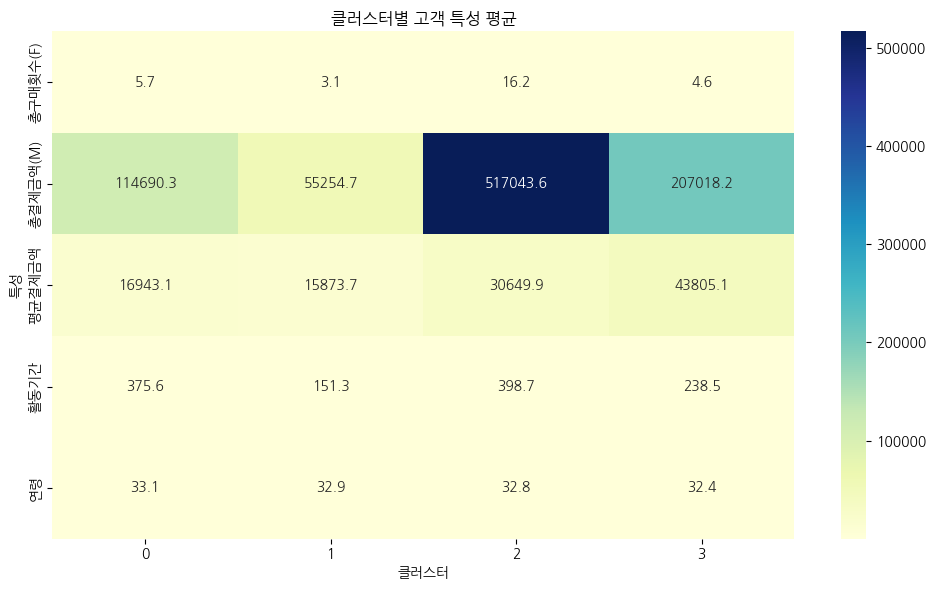

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 사용할 변수 선택 및 결측 제거
cluster_cols = ['총구매횟수(F)', '총결제금액(M)', '평균결제금액', '활동기간', '연령']
df_cluster = df_target[cluster_cols].dropna().copy()

# 2. 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# 3. KMeans 군집화 (k=4, 조정 가능)
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster['클러스터'] = kmeans.fit_predict(X_scaled)

# 4. 클러스터별 평균값 요약
cluster_summary = df_cluster.groupby('클러스터')[cluster_cols].mean()

# 5. 시각화 - 히트맵 형태
plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary.T, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('클러스터별 고객 특성 평균')
plt.ylabel('특성')
plt.xlabel('클러스터')
plt.tight_layout()
plt.show()

# 6. 클러스터 번호 붙이기
df_target['클러스터'] = df_cluster['클러스터'].values